In [2]:
from scipy.interpolate import interp2d
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Data Points

In [10]:
# Learning rate
X = np.array([1e-05, 3e-05, 5e-05, 7e-05, 9e-05, 1e-04])

# Epoch
Y = np.linspace(1,9,9)

# F1-SCORES
Z_infoXLM_1 = np.array([[59, 83, 88, 83, 87, 10],
[87,90,90,9,10,10],
[88,88,91,92,10,9],
[92,10,91,90,10,10],
[91,92,10,92,9,82],
[91,91,91,10,91,10],
[91,92,91,94,10,10],
[88,92,92,90,10,91],
[90,91,92,92,10,10]])

Z_infoXLM_2 = np.array([[0.7150535110327582, 0.6569799441342706, 0.10306917086578103, 0.10306917086578103, 0.10306917086578103, 0.10306917086578103], 
[0.8898185991920239, 0.9160030683810637, 0.8977754237288136, 0.10306917086578103, 0.8560408779506017, 0.12890276538804638], 
[0.8819054827764145, 0.9237134599903807, 0.890787315472936, 0.8537518272687764, 0.10306917086578103, 0.8810550922943254], 
[0.8814315980629541, 0.9071888633184576, 0.10306917086578103, 0.3460268545014308, 0.10306917086578103, 0.10306917086578103], 
[0.9074505322989875, 0.9233069190696309, 0.9152542372881356, 0.876047431073492, 0.10306917086578103, 0.10306917086578103], 
[0.9160030683810637, 0.9236713198261388, 0.8975943138326954, 0.8977571770334928, 0.10306917086578103, 0.10306917086578103], 
[0.8984609001470342, 0.9153948059742459, 0.10306917086578103, 0.9234958198181735, 0.9061777622211076, 0.10306917086578103], 
[0.9069988310929281, 0.932148305467276, 0.9153883779134144, 0.8807657997666918, 0.8799806567198094, 0.8525194324538229], 
[0.9069630934037713, 0.9062221231043711, 0.9233652083135876, 0.906555366495039, 0.8906942497486654, 0.10306917086578103]])

Z_XLMR_1 = [[80,92,91,86,90,82],
[89,91,91,86,90,89],
[91,90,91,90,91,10],
[91,92,91,92,89,11],
[94,92,93,91,88,86],
[91,92,89,91,89,10],
[90,94,90,91,29,89],
[93,90,93,93,90,9],
[91,92,92,92,92,26]]

Z_XLMR_2 = [[0.7879057114051692, 0.9156224451319173, 0.6842360137632216, 0.8717487072376651, 0.10306917086578103, 0.1472087234799099], 
[0.9157426348546689, 0.8980996404725219, 0.8985808502848032, 0.8804943177380301, 0.10306917086578103, 0.0852133255406195], 
[0.9157838983050848, 0.8982317117910339, 0.9239209497015027, 0.873719181702567, 0.10306917086578103, 0.10306917086578103], 
[0.9236713198261389, 0.9239558111380146, 0.8895570089090524, 0.9406190271708471, 0.10306917086578103, 0.8899463763481227], 
[0.9154463734303162, 0.9323665771712935, 0.9065806628696905, 0.8896035108958837, 0.25402420292814587, 0.9160396808937561], 
[0.914951573849879, 0.9067497642756939, 0.9322033898305084, 0.9072672781913105, 0.10306917086578103, 0.8895010282042188], 
[0.8980996404725218, 0.9238663878494388, 0.8982751880045075, 0.8805992736077483, 0.10306917086578103, 0.10306917086578103], 
[0.9160078645858594, 0.9324050375906765, 0.9072471337912303, 0.9057857229746168, 0.906463194240574, 0.10306917086578103], 
[0.9237943579648471, 0.9152542372881356, 0.9066154184798252, 0.8983231527578318, 0.9071606359741953, 0.0852133255406195]]

Z_XLMR_3 = np.array([[0.7397377249387882, 0.9146668868542353, 0.8231700364767237, 0.8904358353510897, 0.9074178274891923, 0.9069988310929281, 0.0852133255406195, 0.10306917086578103], 
[0.8976857282468995, 0.8989822243475079, 0.9056384710038503, 0.8980996404725219, 0.8990926054142502, 0.10306917086578103, 0.8716188469482619, 0.0852133255406195], 
[0.8632193422634645, 0.9153937843416576, 0.915332548807125, 0.9068310220852593, 0.9160030683810637, 0.9065806628696905, 0.9164652067266258, 0.863628785773826], 
[0.9067796610169492, 0.9155708698081579, 0.9238828967642527, 0.9157741936274225, 0.914787331312755, 0.915765651609764, 0.8813210292404705, 0.9069717971591298], 
[0.915332548807125, 0.9405128769535549, 0.9410723457333627, 0.9151515151515152, 0.9156232104800195, 0.9074178274891923, 0.10306917086578103, 0.891102236941239], 
[0.9066604299655148, 0.9321277239709443, 0.9153937843416576, 0.8979932219776706, 0.898628450359553, 0.8985105290190035, 0.9156224451319173, 0.8977920958673616], 
[0.9236589681504936, 0.9323409641206252, 0.923758939206444, 0.9324594896628795, 0.9151350062367012, 0.9064036246239636, 0.8814896647963485, 0.8975983057852205], 
[0.9238683606128442, 0.9574594896628795, 0.9406870702375492, 0.9322335154776306, 0.9061009611857069, 0.9321888536790998, 0.906382514562323, 0.8986077481840193], 
[0.9236713198261389, 0.9153937843416576, 0.8978079545840485, 0.957654003365455, 0.8896035108958837, 0.9067497642756939, 0.8898305084745762, 0.5651878768284269]])

Z_XLMR_4 = np.array([[0.7182471321398801, 0.9078460439255105, 0.9077521533759377, 0.8808073253430881, 0.8897202084754182, 0.8979744226033904, 0.899410723992287, 0.8735367577684887], 
[0.8980058493881778, 0.9071606359741953, 0.8984292712094382, 0.9242724317991219, 0.9069630934037713, 0.9153692847939057, 0.0852133255406195, 0.8647689410401275], 
[0.923888410099269, 0.9322033898305084, 0.9241953274866318, 0.8892898736706162, 0.2738484736902527, 0.914787331312755, 0.0852133255406195, 0.9069038474806246], 
[0.8900775406573801, 0.907021382647728, 0.9151350062367012, 0.914638751079429, 0.9323677673874927, 0.8727025898078531, 0.8982307840985363, 0.12890276538804638], 
[0.9064668382464993, 0.9151515151515152, 0.923728813559322, 0.9319507978661773, 0.9066213921901527, 0.9067727089445364, 0.889800611733321, 0.0852133255406195], 
[0.9318249547063107, 0.9239209497015027, 0.9143661715257273, 0.924119759526152, 0.8899744323473139, 0.9407469585815147, 0.8911339340292087, 0.0852133255406195], 
[0.9151515151515152, 0.923728813559322, 0.9064201335387777, 0.9492979038869669, 0.8982751880045075, 0.9065587371783537, 0.8982317117910339, 0.8819041152278727], 
[0.923728813559322, 0.9153508267598832, 0.9318308809834234, 0.8987370509742671, 0.9236045160782906, 0.914787331312755, 0.9232056495879779, 0.915079803471233], 
[0.9324594896628795, 0.9322104110204598, 0.9154071828812169, 0.9067098156081207, 0.9236530418733808, 0.8897791474062661, 0.9235543797424195, 0.8981487017915047]])

Z_CBERT = [[76.32,82.84,89.81,88.29,86.00,88.88],
[83.80,86.39,87.28,89.87,87.25,88.05],
[86.48,89.81,90.72,89.81,90.67,88.08],
[85.51,88.95,86.45,86.39,88.10,89.05],
[85.57,89.87,90.73,86.41,85.65,87.33],
[88.21,90.60,88.16,88.13,87.28,85.60],
[86.35,86.36,92.43,85.48,85.65,85.48],
[89.84,89.83,88.99,87.26,84.62,84.75],
[89.00,87.27,84.72,89.84,85.45,90.68]]

Z_CBERTWE = [[89.05,85.73,90.79,89.10,87.49,88.19],
[87.45,89.87,89.83,88.19,90.68,88.15],
[88.15,89.86,93.24,87.34,90.63,84.83],
[89.91,89.91,90.73,89.81,92.43,88.89],
[88.97,88.99,88.13,86.42,89.87,88.20],
[89.02,89.37,91.48,88.89,89.78,88.07],
[88.20,89.84,88.13,87.26,86.54,88.18],
[89.88,90.72,89.80,86.46,87.34,85.58],
[88.09,90.62,89.86,88.15,89.03,87.39]]



In [17]:
xlmr_ave = np.sum([Z_XLMR_3,Z_XLMR_4], axis=0)/2
xlmr_max = np.max(xlmr_ave)
print(np.max(Z_XLMR_4))
print(np.where(Z_XLMR_4==np.max(Z_XLMR_4)))

0.9492979038869669
(array([6]), array([3]))


In [ ]:
# Interpolate
x = np.linspace(1e-05, 1e-04, 100)
y = np.linspace(1,10,100)

# InfoXLM
z_info_func = interp2d(X,Y,Z_infoXLM_1,kind = 'linear')
z_infoXLM = z_info_func(x,y)

# XLM-R
z_XLMR_func = interp2d(X,Y,Z_XLMR_1,kind = 'linear')
z_XLMR = z_XLMR_func(x,y)

## XLM-R Figures

0.9406190271708471
(array([3]), array([3]))


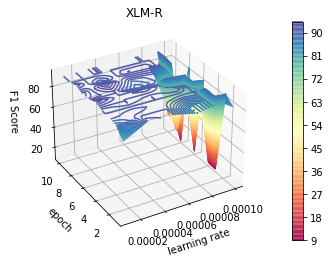

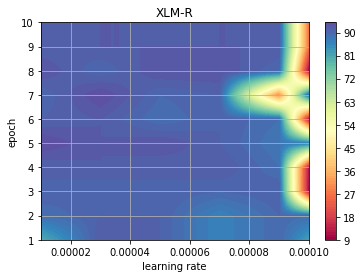

In [7]:
# max F1 score
print(np.max(Z_XLMR_2))
print(np.where(Z_XLMR_2==np.max(Z_XLMR_2)))

# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_XLMR, 200, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.view_init(elev=30.,azim=-120)
ax.set_title('XLM-R')
axins = inset_axes(ax,
                    width="5%",  
                    height="100%",
                    loc='right',
                    borderpad=-5
                   )
cbar = plt.colorbar(cs, cax=axins, orientation="vertical")
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_XLMR, 100, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('XLM-R')
plt.grid()
cbar = plt.colorbar(cs)

plt.show()

## InfoXLM Figures

0.932148305467276
(array([7]), array([1]))


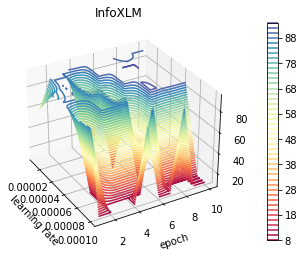

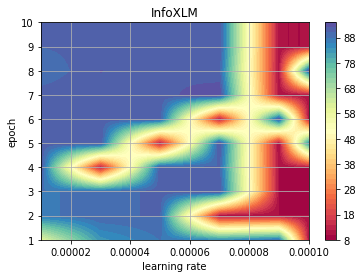

In [8]:
# max F1 score
print(np.max(Z_infoXLM_2))
print(np.where(Z_infoXLM_2==np.max(Z_infoXLM_2)))

# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

cs = ax.contour3D(x, y, z_infoXLM,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.view_init(elev=30.,azim=-30)
ax.set_title('InfoXLM')
axins = inset_axes(ax,
                    width="5%",  
                    height="100%",
                    loc='right',
                    borderpad=-5
                   )
cbar = plt.colorbar(cs, cax=axins, orientation="vertical")
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_infoXLM,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('InfoXLM')
plt.grid()
cbar = plt.colorbar(cs)
plt.show()

## CBERT Figures

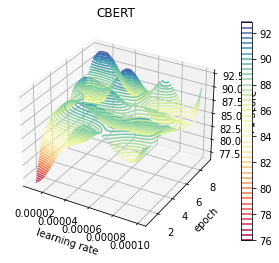

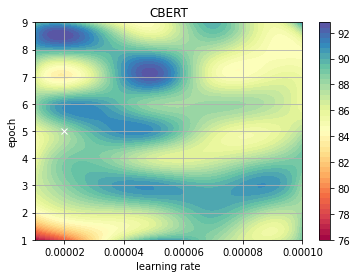

In [13]:
# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_CBERT,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.set_title('CBERT')
cbar = plt.colorbar(cs)
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_CBERT,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('CBERT')
plt.grid()
cbar = plt.colorbar(cs)
plt.show()

## Chinese-BERT-WWM-EXT Figures

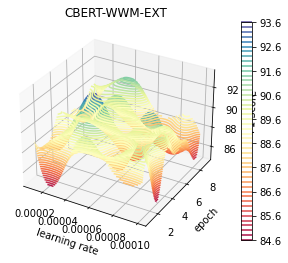

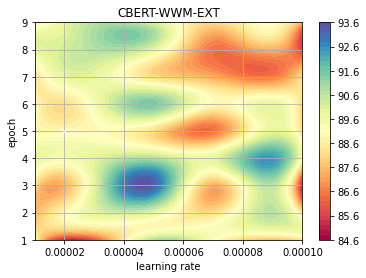

In [9]:
# 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
cs = ax.contour3D(x, y, z_CBERTWE,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
ax.set_xlabel('learning rate')
ax.set_ylabel('epoch')
ax.set_zlabel('F1 Score')
ax.set_title('CBERT-WWM-EXT')
cbar = plt.colorbar(cs)
plt.show()

# 2D
fig = plt.figure()
cs = plt.contourf(x, y, z_CBERTWE,  50, cmap='Spectral') # colors: https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html?highlight=cmap
plt.xlabel('learning rate')
plt.ylabel('epoch')
plt.title('CBERT-WWM-EXT')
plt.grid()
cbar = plt.colorbar(cs)
plt.show()